In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#import cleaned data
data_set = pd.read_csv('clean_data.csv', header=0)

# #import data schema
# data_schema = pd.read_csv('./cleaned_HCMST_2017_schema.csv', header=0, index_col=0)
# data_set

In [117]:
#split data set into in sample and out-of-sample (OOS) data,
#so that a machine learning model can be built, and we can use the model to classify OOS data
oos_size = int(0.10*data_set.shape[0])
ins_size = data_set.shape[0] - oos_size
data = data_set[:ins_size]
oos_data = data_set[ins_size:]

## Analysis Goals

The following are the questions we are trying to answer with the data set:

1) Where are the top fives places couples met that resulted in relationships that lasted the longest?

2) Does household income between partners affect the length of the relationship?

3) Does religiosity affect the length of the relationship?

4) Do political leanings affect the length of the relationship?

5) Do differences in educational level affect the length of the relationship?

6) Does age difference between partners affect the length of the relationship?

**The exploratory data analysis in this workbook will help us answer these questions**

In [118]:
data.describe(include=[np.number])

,Years_Together,First_Together,End_Year,Age_Diff,Age,P_Age
count,2632.000000,2632.000000,112.000000,2631.000000,2632.000000,2631.000000
mean,23.505699,1993.000000,2005.383929,4.229571,50.457827,50.188521
std,16.932018,17.032734,10.709300,4.891186,16.272332,16.285879
min,0.000000,1939.000000,1973.000000,0.000000,18.000000,17.000000
25%,9.000000,1980.000000,1997.750000,1.000000,37.000000,36.000000
50%,21.000000,1996.000000,2009.000000,3.000000,52.000000,51.000000
75%,36.000000,2007.000000,2014.000000,6.000000,63.000000,63.000000
max,78.000000,2017.000000,2017.000000,45.000000,93.000000,95.000000


In [119]:
pd.set_option('display.max_columns', None)
data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
count,2632,2632,2613,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2632
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,1856,734,2211,990,611,1318,358,1940,2115,503,754,2217,2387,2535,2610,2586,2611,2613,2619,2622,2615,2618,2625,2625,2623,2571,2293,2364,2515,2416,2426,2414,2055,2324,2499,2436,2543,2567,2548,2570,2484,2481,2539,2552,2570,2541,2348


**We want to investigate the first question:**

1) Where are the top fives places couples met that resulted in relationships that lasted the longest?

In [120]:
#collect venue columns as a single column called places
places = data.columns[list(data.columns).index('school')::]

In [121]:
data[places]

,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes
2,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
3,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no
4,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2628,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
2629,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
2630,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [122]:
#convert yes or no answers to 0 and 1, combine these results as the new column 'met_places'
p_cols = data[places].copy()
p_cols = p_cols.replace({'yes': 1, 'no': 0})
#use idxmax to identify 'yes' i.e. 1
p_cols = p_cols.idxmax(axis=1)
data['places_met'] = p_cols

c:\users\grant\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
data = data[data['Age_Diff'].notna()]

In [124]:
#group Years_Togther by places_met, sort values
place_effect = data.groupby('places_met').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
place_effect

,count,min,median,max,mean
places_met,,,,,
school,1032,0.0,24.0,69.0,25.986434
bar_restaurant,434,0.0,17.0,67.0,20.405530
college,206,0.0,23.5,78.0,26.684466
party,163,0.0,21.0,71.0,22.484663
church,139,0.0,19.0,63.0,23.323741
customer,134,0.0,21.5,59.0,23.067164
public,76,0.0,20.0,68.0,24.657895
internet_dating,67,0.0,4.0,32.0,5.940299
vol_org,65,0.0,19.0,65.0,24.907692


### Question 1 Results: 

- Adjusting for the number of responses, it appears that the top five places/situations in which couples with long lasting relationships met are:

    1. In school
    2. At a bar or restaurant
    3. In college
    4. At a party
    5. At church
    
    
- Among other categories with a siginificant number of responses (~50), couples met via internet settings have the most short-lived relationships on average.

In [125]:
income_effect = data.groupby('Household_Income').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
income_effect

,count,min,median,max,mean
Household_Income,,,,,
"$100,000 to $124,999",358,0.0,23.0,69.0,24.717877
"$60,000 to $74,999",263,0.0,18.0,66.0,21.866920
"$50,000 to $59,999",214,0.0,22.0,69.0,24.065421
"$125,000 to $149,999",180,0.0,26.0,62.0,25.211111
"$85,000 to $99,999",180,0.0,20.0,64.0,23.133333
"$75,000 to $84,999",178,0.0,25.5,68.0,26.438202
"$150,000 to $174,999",170,0.0,26.0,64.0,26.041176
"$40,000 to $49,999",159,0.0,16.0,68.0,22.603774
"$175,000 to $199,999",115,0.0,27.0,78.0,27.747826


It seems like household income is a good predictor of relationship length, up until maybe 30,000 per household. Let's convert household income into ordinal form to enhance the clarity of any trends.

In [126]:
hh_labels = data['Household_Income'].unique()
#leave out the first (<$5,000) and last elements ($250,000), create a dictionary for the middle elements
inc_dict = {}

for l in hh_labels:
    if ' to ' in l:
        k = int(l[0:l.find(' to ',0)].replace('$','').replace(',',''))
        inc_dict[l] = k
inc_dict_val = sorted(list(inc_dict.values()))

for l in hh_labels:
    if ' to ' in l:
        inc_dict[l] = inc_dict_val.index(inc_dict[l]) + 1
    
inc_dict['Less than $5,000'] = 0
inc_dict['$250,000 or more'] = len(hh_labels) - 1
inc_dict

{'$150,000 to $174,999': 17,
 '$200,000 to $249,999': 19,
 '$175,000 to $199,999': 18,
 '$75,000 to $84,999': 13,
 '$50,000 to $59,999': 11,
 '$60,000 to $74,999': 12,
 '$85,000 to $99,999': 14,
 '$100,000 to $124,999': 15,
 '$20,000 to $24,999': 6,
 '$40,000 to $49,999': 10,
 '$15,000 to $19,999': 5,
 '$30,000 to $34,999': 8,
 '$10,000 to $12,499': 3,
 '$25,000 to $29,999': 7,
 '$5,000 to $7,499': 1,
 '$125,000 to $149,999': 16,
 '$35,000 to $39,999': 9,
 '$12,500 to $14,999': 4,
 '$7,500 to $9,999': 2,
 'Less than $5,000': 0,
 '$250,000 or more': 20}

In [127]:
#convert 'Household_Income' to ordinal numeric form
data = data.replace({'Household_Income': inc_dict})
income_effect = data.groupby('Household_Income').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['mean'], ascending=False)

In [128]:
income_effect.sort_index(ascending=False)

,count,min,median,max,mean
Household_Income,,,,,
20,98,0.0,21.0,62.0,24.755102
19,94,1.0,25.0,63.0,25.680851
18,115,0.0,27.0,78.0,27.747826
17,170,0.0,26.0,64.0,26.041176
16,180,0.0,26.0,62.0,25.211111
15,358,0.0,23.0,69.0,24.717877
14,180,0.0,20.0,64.0,23.133333
13,178,0.0,25.5,68.0,26.438202
12,263,0.0,18.0,66.0,21.866920


R-square:  0.775


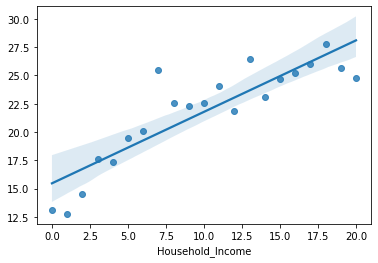

In [129]:
from sklearn.linear_model import LinearRegression
#create dict to store regression R-square values
q_score = {}

#perform linear regression
X = income_effect.index.to_numpy().reshape(-1,1)
y = income_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[2] = reg.score(X,y)
print(f'R-square: {q_score[2]: 0.3f}')
sns.regplot(y=y, x=income_effect.index)
plt.show()

A linear regression provides a decent fit of the relationship, but by observing both the data points and the fitted curve, we realize there is some degree of underfitting. Try a order 2 polynomial regression instead.

R-square:  0.890


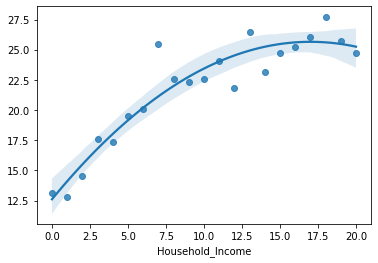

In [130]:
X = pd.DataFrame(list(income_effect.index))
X2  = pd.Series([x**2 for x in list(income_effect.index)])
X = pd.concat([X, X2], axis=1)
y = income_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[2] = reg.score(X,y)
print(f'R-square: {q_score[2]: 0.3f}')
sns.regplot(y=y, x=income_effect.index, order=2)
plt.show()

The second order polynomial regression provides a better fit. We can take the derivative of the fitted curve to figure out the optimum income bracket for long-lasting relationships.

In [131]:
#find the minimum by setting 2ax+b = 0
reg_coef = reg.coef_[0]
X_min = -reg_coef[0]/(2*reg_coef[1])
X_min

17.01033292674874

In [132]:
#The numeric value that gives the minimum point is 17 in 'Household_Income' is:
for k in inc_dict:
    if inc_dict[k] == 17:
        print(k)

$150,000 to $174,999


### Question 2 results:
The longevity of relationship increases with increasing income up until the income bracket of "150,000 to 174,999". Beyond 174,999, the longevity of relationship actually decreases, indicating that "150,000 to 174,999" is likely the sweet spot for an income bracket that maximize relationship longevity.

In [133]:
religion_effect = data.groupby('Religious_Attendance').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
religion_effect

,count,min,median,max,mean
Religious_Attendance,,,,,
Never,734,0.0,16.0,69.0,20.444142
Once a week,513,0.0,26.0,78.0,27.684211
Once a year or less,509,0.0,18.0,65.0,21.866405
A few times a year,429,0.0,21.0,68.0,23.505828
Once or twice a month,225,0.0,18.0,69.0,22.066667
More than once a week,216,1.0,29.0,68.0,29.444444
Refused,5,3.0,25.0,46.0,23.600000


We want to convert religious attendance to an ordinal numeric form, with "More than one a week" being 0, and "Never" being 5. Observing that the category "Refused" has a very small population (~5), and its mean is very close to that of the category "A few times a year", let's reclassify "Refused" to "A few times a year".  

In [134]:
data = data.replace({'Religious_Attendance': {'Refused': 'A few times a year'}})
rel_dict = {'More than once a week': 0, 'Once a week': 1, 'Once or twice a month': 2, 
           'A few times a year': 3, 'Once a year or less': 4, 'Never': 5}
data = data.replace({'Religious_Attendance': rel_dict})
religion_effect = data.groupby('Religious_Attendance').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
religion_effect.sort_index()

,count,min,median,max,mean
Religious_Attendance,,,,,
0,216,1.0,29.0,68.0,29.444444
1,513,0.0,26.0,78.0,27.684211
2,225,0.0,18.0,69.0,22.066667
3,434,0.0,21.0,68.0,23.506912
4,509,0.0,18.0,65.0,21.866405
5,734,0.0,16.0,69.0,20.444142


R-square:  0.828


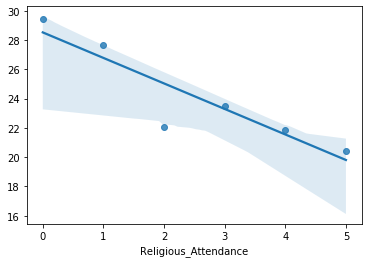

In [135]:
X = religion_effect.index.to_numpy().reshape(-1,1)
y = religion_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[3] = reg.score(X,y)
print(f'R-square: {q_score[3]: 0.3f}')
sns.regplot(y=y, x=religion_effect.index)
plt.show()

### Question 3 results:
The longevity of relationship decreases with decreasing religious attendance. Couple that are most pious tend to stay together the longest.

In [136]:
pol_effect = data.groupby('Politics').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
pol_effect

,count,min,median,max,mean
Politics,,,,,
Strong Democrat,503,0.0,19.0,68.0,22.536779
Leans Democrat,476,0.0,16.0,69.0,21.056723
Leans Republican,474,0.0,22.0,71.0,25.086498
Strong Republican,401,0.0,29.0,68.0,28.107232
Not Strong Democrat,364,0.0,15.0,69.0,19.357143
Not Strong Republican,343,0.0,25.0,78.0,26.131195
Undecided/Independent/Other,70,0.0,13.0,61.0,19.071429


In [137]:
pol_dict = {'Strong Republican': 0, 'Leans Republican': 1, 'Not Strong Republican': 2,
           'Undecided/Independent/Other': 3, 'Not Strong Democrat': 4, 'Leans Democrat': 5,
            'Strong Democrat': 6}

In [138]:
#we want to convert political affiliation to an ordinal numeric form, for both the features 'Politics' and 'P_Politics'
data = data.replace({'Politics': pol_dict})
data = data.replace({'P_Politics': pol_dict})
data.groupby('P_Politics').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
P_Politics,,,,,
3,754,0.0,15.0,69.0,19.620690
0,450,0.0,30.0,69.0,29.155556
6,412,0.0,21.0,68.0,24.036408
5,370,0.0,18.0,66.0,20.954054
1,336,0.0,22.5,71.0,25.479167
4,161,0.0,23.0,67.0,24.708075
2,134,0.0,25.5,78.0,25.992537
Refused,14,0.0,17.0,46.0,19.500000


Observing that the category "Refused" has a very small population (14), and its mean is very close to that of the category 3, let's reclassify "Refused" to category 3. Category 3 represents a substantial difference between the political views of the survey respondent and the respondent's partner.

In [139]:
data = data.replace({'P_Politics': {'Refused': 3}})

In [140]:
pol_col = abs(data.Politics - data.P_Politics)
# pol_col
data.insert(loc=8, column='Pol_Diff', value=pd.Series(pol_col))
pol_effect = data.groupby('Pol_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
pol_effect

,count,min,median,max,mean
Pol_Diff,,,,,
0,859,0.0,26.0,78.0,26.898719
1,715,0.0,19.0,69.0,22.148252
2,673,0.0,19.0,69.0,22.462110
3,194,0.0,17.0,55.0,19.489691
4,117,0.0,21.0,64.0,22.914530
5,55,0.0,14.0,64.0,19.400000
6,18,0.0,13.0,58.0,15.388889


R-square:  0.719


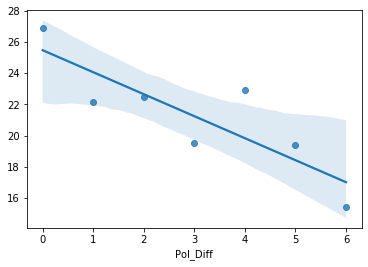

In [141]:
X = pol_effect.index.to_numpy().reshape(-1,1)
y = pol_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[4] = reg.score(X,y)
print(f'R-square: {q_score[4]: 0.3f}')
sns.regplot(y=y, x=pol_effect.index)
plt.show()

### Question 4 results:
The longevity of relationship decreases with increasing political differences. Couple with the most polarized position in politics (Category 6) have relationships that are approximately 10 years shorter than average compared to those who are in complete political alignment (Category 0).

In [142]:
edu_effect = data.groupby('Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
Education,,,,,
Bachelor's degree or higher,990,0.0,20.0,78.0,22.508081
Some college,775,0.0,19.0,69.0,22.416774
High school,674,0.0,25.0,71.0,26.685460
Less than high school,192,0.0,21.0,67.0,21.994792


In [143]:
edu_effect = data.groupby('P_Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
P_Education,,,,,
HS graduate or GED,611,0.0,22.0,71.0,24.649755
Bachelors degree,592,0.0,17.0,65.0,21.582770
"Some college, no degree",567,0.0,21.0,65.0,23.218695
Masters degree,311,0.0,24.0,78.0,25.186495
Associate degree,262,0.0,20.5,69.0,22.606870
Professional or Doctorate degree,123,0.0,21.0,64.0,25.365854
12th grade no diploma,75,0.0,19.0,63.0,23.840000
11th grade,24,1.0,19.5,56.0,24.166667
10th grade,20,2.0,19.0,39.0,19.850000


We have a lot more categories for the education level of partners compared to the respondents. For the sake of simplifying the analysis, let's recategorize every option from 12th grade and below to be "Less than high school". We also want to categorize associate's degree as "Some college", and categorize master and PhDs to be "Bachelor's degree or higher"

In [144]:
p_edu_list = list(edu_effect.index)
p_edu_dict = {x: 'Less than high school' for x in p_edu_list[p_edu_list.index('12th grade no diploma'):]}
p_edu_dict[p_edu_list[0]] = 'High school'
for i in [2, 4]:
    p_edu_dict[p_edu_list[i]] = 'Some college'
for i in [1, 3, 5]:
    p_edu_dict[p_edu_list[i]] = 'Bachelor\'s degree or higher'
p_edu_dict

{'12th grade no diploma': 'Less than high school',
 '11th grade': 'Less than high school',
 '10th grade': 'Less than high school',
 '7th or 8th grade': 'Less than high school',
 '9th grade': 'Less than high school',
 '5th or 6th grade': 'Less than high school',
 '1st-4th grade': 'Less than high school',
 'No formal education': 'Less than high school',
 'Refused': 'Less than high school',
 'HS graduate or GED': 'High school',
 'Some college, no degree': 'Some college',
 'Associate degree': 'Some college',
 'Bachelor\x92s degree': "Bachelor's degree or higher",
 'Master\x92s degree': "Bachelor's degree or higher",
 'Professional or Doctorate degree': "Bachelor's degree or higher"}

In [145]:
data = data.replace({'P_Education': p_edu_dict})
data.groupby('P_Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
P_Education,,,,,
Bachelor's degree or higher,1026,0.0,20.0,78.0,23.128655
Some college,829,0.0,21.0,69.0,23.025332
High school,611,0.0,22.0,71.0,24.649755
Less than high school,165,0.0,20.0,66.0,24.157576


In [146]:
#convert educational categories to ordinal form, create a new feature called 'Edu_Diff'
edu_cat_dict = {'Bachelor\'s degree or higher': 0, 'Some college': 1, 'High school': 2, 'Less than high school': 3}
data = data.replace({'Education': edu_cat_dict})
data = data.replace({'P_Education': edu_cat_dict})
edu_col = abs(data.Education - data.P_Education)
data.insert(loc=8, column='Edu_Diff', value=pd.Series(edu_col))
edu_effect = data.groupby('Edu_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
Edu_Diff,,,,,
0,1342,0.0,21.0,78.0,23.766766
1,983,0.0,19.0,68.0,22.811801
2,282,0.0,22.0,64.0,24.773050
3,24,2.0,21.5,60.0,23.333333


R-square:  0.011


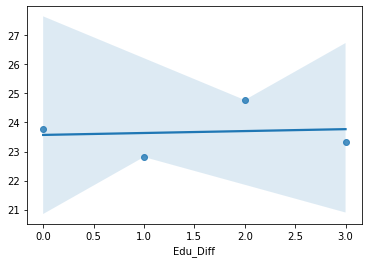

In [147]:
X = edu_effect.index.to_numpy().reshape(-1,1)
y = edu_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[5] = reg.score(X,y)
print(f'R-square: {q_score[5]: 0.3f}')
sns.regplot(y=y, x=edu_effect.index)
plt.show()

### Question 5 results:
Broadly speaking, it appears that differences in educational level between partner has negligible effect on the longevity of relationships. However, we do notice from the analysis obtained with the initial P_Education feature, that respondents with partners that are overwhelming less educated tend to have longer relationships on average. This is rather intuitive given that a large difference in educational level may imply that one party is very likely more financially depend on the other, thus discouraging the more dependent party from ending the relationship. However, more granularity in the feature 'Education' is required to verify this hypothesis.

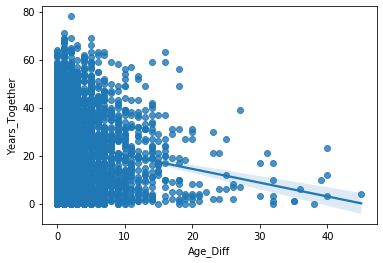

In [148]:
sns.regplot(y=data['Years_Together'], x=data['Age_Diff'])
plt.show()

In [149]:
from sklearn.linear_model import LinearRegression
X = data['Age_Diff'].to_numpy().reshape(-1,1)
y = data['Years_Together'].to_numpy().reshape(-1,1)
# data['Age_Diff'].unique()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.027537811939220336

The scatterplot above shows very minor correlation between 'Years_Together' and 'Age_Diff'. However, this likely because a large number of data plots are overlapping. Create a swarm plot to verify

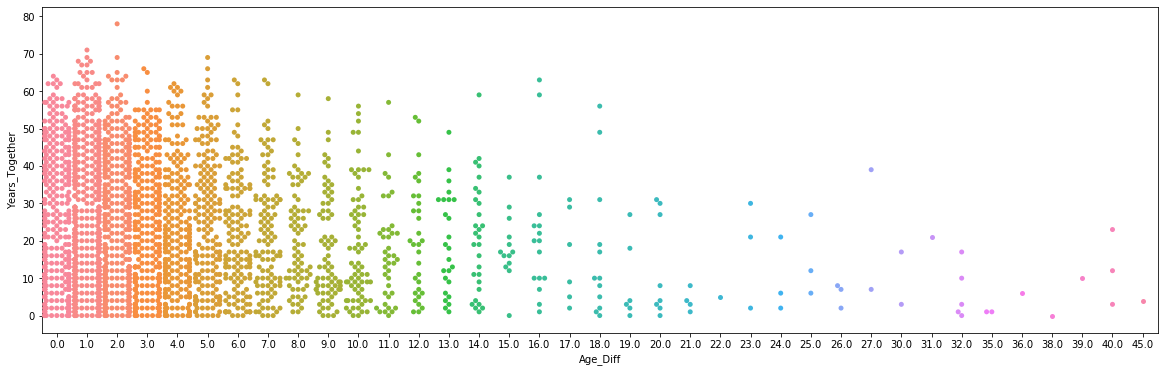

In [150]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='Age_Diff', y='Years_Together', data=data)
plt.show()

As expected, a large number of data points are overlapping for the values 0 through 7 for the feature 'Age_Diff'. We need to group the data points by age difference and analyze how the mean of 'Years_Together' changes with 'Age_Diff'.

In [151]:
age_diff_effect = data.groupby('Age_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
age_diff_effect

,count,min,median,max,mean
Age_Diff,,,,,
1.0,532,0.0,22.0,71.0,25.808271
2.0,403,0.0,24.0,78.0,25.295285
0.0,326,0.0,22.5,64.0,25.374233
3.0,284,0.0,23.5,66.0,24.806338
4.0,225,0.0,19.0,62.0,21.951111
5.0,182,0.0,23.5,69.0,24.939560
6.0,137,0.0,19.0,63.0,21.489051
7.0,104,0.0,20.0,63.0,21.942308
9.0,74,0.0,13.0,58.0,17.743243


R-square:  0.614


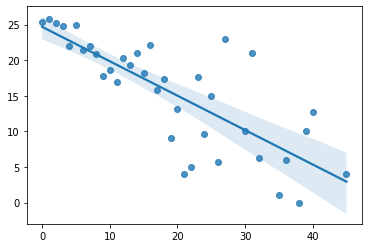

In [152]:
from sklearn.linear_model import LinearRegression
X = age_diff_effect.index.to_numpy().reshape(-1,1)
y = age_diff_effect['mean'].to_numpy().reshape(-1,1)
# data['Age_Diff'].unique()
reg = LinearRegression().fit(X, y)
q_score[6] = reg.score(X,y)
print(f'R-square: {q_score[6]: 0.3f}')
sns.regplot(y=y, x=X)
plt.show()

### Question 6 results:
Generally, it appears that as the age difference between the correspondent and the partner increases, the longevity of their relationship decreases.

## Consolidation of EDA results:

We now consolidate our EDA findings, and finalize the features that we can use for a machine learning model that can predict the number of years a couple in a given training example will stay in a relationship.

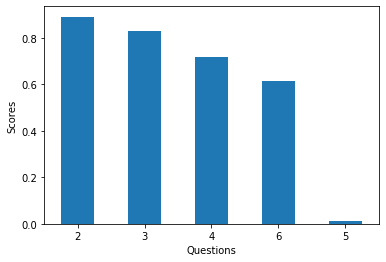

In [153]:
qns_x = [x for x in range(2,7)]
scores_y = [q_score[x] for x in qns_x]
scores = pd.Series(data=scores_y, index=qns_x)
scores.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Questions')
plt.xticks(rotation=0)
plt.ylabel('Scores')
plt.show()

### EDA results:

It appears that the old adage of "No Money, No Honey" is true. Household income is the strongest regression predictor of longevity in relationship, followed closely by religious attendance, political differences, and lastly, age differences. Educational level, with the exception of cases where the differences are extreme, is rather insignificant as a regression predictor.

We can use a combine of classification analysis based on the results from Question 1, and regression analysis from Questions 2 through 5, to predict how long a couple, given as a training example, would stay in relationship. A random forest model, which combines both classification and regression analysis in making predictions, is a good starting point.